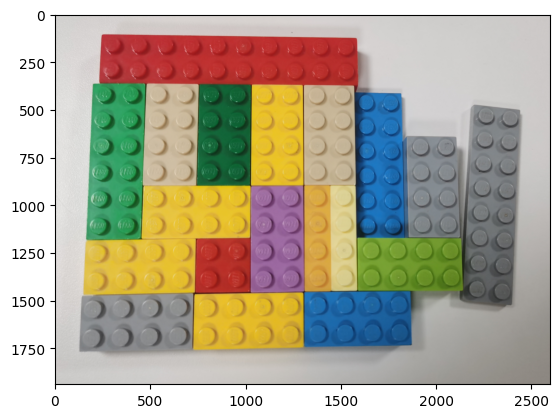

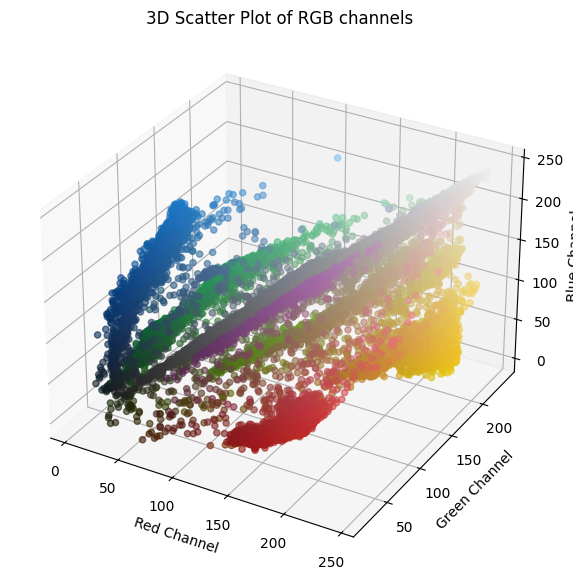

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image file
img_path = 'test_images/2.jpg' # Replace with your image file path
img = Image.open(img_path)

# Convert the image to RGB if it is a .png with an alpha channel
img = img.convert('RGB')

#显示图片
plt.imshow(img)

# Extract RGB channels
r, g, b = img.split()

# Convert the RGB image to numpy arrays and flatten to 1D arrays
r = np.array(r).flatten()
g = np.array(g).flatten()
b = np.array(b).flatten()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Sample the data to reduce the number of points in the scatter plot
# This is just for visualization purposes and faster rendering
sample_rate = 0.01  # Percentage of points to sample, adjust as needed
total_points = len(r)
sampled_indices = np.random.choice(total_points, int(total_points * sample_rate), replace=False)

# Scatter plot, color points by their actual color
ax.scatter(r[sampled_indices], g[sampled_indices], b[sampled_indices],
           c=np.stack((r, g, b), axis=1)[sampled_indices]/255.0, alpha=0.6)

# Set labels for the axes
ax.set_xlabel('Red Channel')
ax.set_ylabel('Green Channel')
ax.set_zlabel('Blue Channel')

# Set the title of the plot
ax.set_title('3D Scatter Plot of RGB channels')

# Show the plot
plt.show()


In [20]:
import matplotlib.pyplot as plt
#导入sklearn库中的kmeans算法包
from sklearn.cluster import KMeans

#把图像转为一个五维的数据集，每个维度分别是红、绿、蓝、横坐标、纵坐标
#这样做的原因是：我们要用kmeans算法对图像进行聚类，而kmeans算法是基于距离的算法，所以我们要把图像转为一个五维的数据集，每个维度分别是红、绿、蓝、横坐标、纵坐标

img_vector = []
for i in range(img.size[0]):
    for j in range(img.size[1]):
        img_vector.append([r[i*img.size[1]+j],g[i*img.size[1]+j],b[i*img.size[1]+j],i,j])
        
#转为numpy array
img_vector = np.array(img_vector)

In [21]:
#全部转为float类型
img_vector = img_vector.astype(float)

In [22]:
#把向量的每个维度归一化到0-1之间
#前三个维度是颜色，所以要除以255.0
#后两个维度是横纵坐标，所以要除以图像的长宽
img_vector[:,0] = img_vector[:,0]/255.0



In [23]:
img_vector[:,1] = img_vector[:,1]/255.0
img_vector[:,2] = img_vector[:,2]/255.0
img_vector[:,3] = img_vector[:,3]/img.size[0]
img_vector[:,4] = img_vector[:,4]/img.size[1]

In [24]:
#输入img_vector，聚类成20类
kmeans = KMeans(n_clusters=20, random_state=0).fit(img_vector)
#打印出20类的中心点

D:\conda_envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
print(kmeans.cluster_centers_)

[[0.81977154 0.80328073 0.78940617 0.1324873  0.15760663]
 [0.51800747 0.49257236 0.52933725 0.47313469 0.24639237]
 [0.66852908 0.65867477 0.64512281 0.89146911 0.16439555]
 [0.80671663 0.77200263 0.69442294 0.45982692 0.75278013]
 [0.11194647 0.38561709 0.62703195 0.69547246 0.74463144]
 [0.45015097 0.39784026 0.23701603 0.69288842 0.24871345]
 [0.66882544 0.6589531  0.64543876 0.89081378 0.83602694]
 [0.87110811 0.71409683 0.20625495 0.60343972 0.24985451]
 [0.87048776 0.71312745 0.20684685 0.60491632 0.74987522]
 [0.14743049 0.45716613 0.33850706 0.35909457 0.75431863]
 [0.82034454 0.80435907 0.79147333 0.1297957  0.83761816]
 [0.8077286  0.77423033 0.69776109 0.46683958 0.2488086 ]
 [0.52183051 0.49075798 0.53193438 0.47316114 0.75155459]
 [0.81846136 0.80079853 0.78420928 0.14469478 0.49601641]
 [0.70761664 0.19222185 0.18860949 0.12607763 0.25006705]
 [0.44663533 0.39687776 0.23518763 0.68983364 0.75003964]
 [0.14467418 0.44729208 0.28758244 0.36655604 0.25404556]
 [0.65549991 0

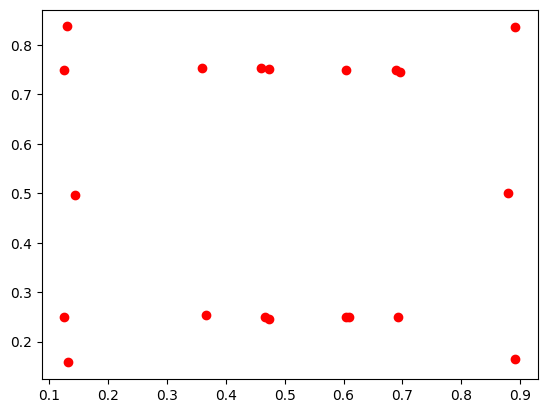

In [26]:
#把样本中心的i,j坐标在图像中显示出来
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(kmeans.cluster_centers_[i][3],kmeans.cluster_centers_[i][4],c='r')


In [27]:
#打印每一类的样本数目
print(np.unique(kmeans.labels_,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([297370, 258774, 300585, 244261, 137495, 211751, 300690, 354917,
       352245, 226593, 297946, 238948, 256678, 323774, 172399, 210581,
       203902, 314410, 172264, 158061], dtype=int64))


In [32]:
#把坐标映射回原本的图像大小
for i in range(len(kmeans.cluster_centers_)):
    kmeans.cluster_centers_[i][3] = kmeans.cluster_centers_[i][3]*img.size[0]
    kmeans.cluster_centers_[i][4] = kmeans.cluster_centers_[i][4]*img.size[1]

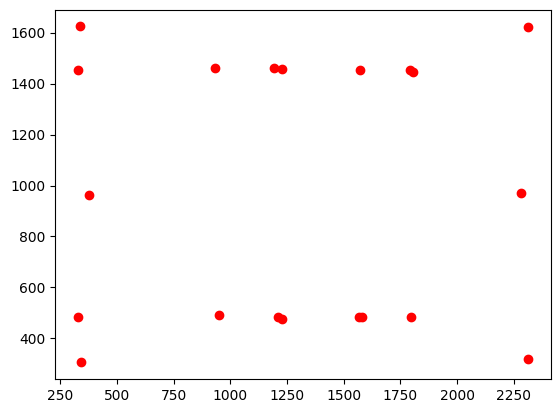

In [33]:
#在图像中显示出来
for i in range(len(kmeans.cluster_centers_)):
    plt.scatter(kmeans.cluster_centers_[i][3],kmeans.cluster_centers_[i][4],c='r')

In [35]:
#把20个类别的样本数量添加到数组中
areas = np.unique(kmeans.labels_,return_counts=True)[1]

#去掉最大的样本数量的类别，因为这个类别是背景
areas = np.delete(areas,np.argmax(areas))

In [36]:
#用K-means对样本数量进行聚类，聚类成5类
kmeans_area = KMeans(n_clusters=5, random_state=0).fit(areas.reshape(-1,1))

D:\conda_envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\conda_envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
#统计每一类的样本数量
for i in range(len(np.unique(kmeans_area.labels_))):
    print(np.unique(kmeans_area.labels_,return_counts=True)[1][i])

4
6
4
4
1


In [28]:
# #定义img_color_vector，读取原始图像的RGB值
# img_color_vector = []
# #定义img_position_vector，读取原始图像的横纵坐标
# img_position_vector = []
# for i in range(img.size[0]):
#     for j in range(img.size[1]):
#         img_color_vector.append([r[i*img.size[1]+j],g[i*img.size[1]+j],b[i*img.size[1]+j]])
#         img_position_vector.append([i,j])
# #转为numpy array
# img_color_vector = np.array(img_color_vector)
# img_position_vector = np.array(img_position_vector)
# #对颜色向量进行聚类，聚类成20类，同时返回每个类别样本中心对应的索引
# kmeans_color = KMeans(n_clusters=20, random_state=0).fit(img_color_vector)
# #取出每个类别样本中心对应的索引
# kmeans_color_labels = kmeans_color.labels_
# print(kmeans_color_labels)
# 
# 


In [29]:
# #打印20个样本中心对应的索引
# print(kmeans_color.cluster_centers_)

In [30]:
# #任意从原始样本中分别取属于20个类别的样本各类一个，打印索引
# k_label =[]
# for i in range(20):
#     print(np.where(kmeans_color_labels==i)[0][0])
#     k_label.append(np.where(kmeans_color_labels==i)[0][0])

In [31]:
# #在图像中显示出来
# for i in range(len(k_label)):
#     plt.scatter(img_position_vector[k_label[i]][0],img_position_vector[k_label[i]][1],c='r')